# 10. one way ANOVA

## 설정

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [4]:
!apt-get install -y fonts-nanum
!fc-chache -fv
!rm ~/.cache/matplotlib -rf

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


'fc-chache' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
sns.set_theme(style="darkgrid")
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

## 데이터 불러오기

In [6]:
owa_df = pd.read_csv('./data/07_1.OWA.csv', encoding = 'cp949')
owa_df.head()

,매장,만족도1,만족도2,만족도3,만족도4,만족도5
0,2,85,85,85,84,84
1,2,82,82,82,81,81
2,3,90,86,88,88,86
3,2,88,88,88,87,87
4,1,93,93,93,93,93


In [8]:
owa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   매장      150 non-null    int64
 1   만족도1    150 non-null    int64
 2   만족도2    150 non-null    int64
 3   만족도3    150 non-null    int64
 4   만족도4    150 non-null    int64
 5   만족도5    150 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [11]:
# 범주형 변수 처리

owa_df['매장'].replace({1:'강남', 2:'강서', 3:'강동'}, inplace = True)
owa_df['매장'] = owa_df['매장'].astype('category')

owa_df.head()

C:\Users\SikBread\AppData\Local\Temp\ipykernel_2036\3923168610.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  owa_df['매장'].replace({1:'강남', 2:'강서', 3:'강동'}, inplace = True)


,매장,만족도1,만족도2,만족도3,만족도4,만족도5
0,강서,85,85,85,84,84
1,강서,82,82,82,81,81
2,강동,90,86,88,88,86
3,강서,88,88,88,87,87
4,강남,93,93,93,93,93


In [15]:
owa_df.groupby('매장')['만족도1'].describe().round(3)

C:\Users\SikBread\AppData\Local\Temp\ipykernel_2036\2241217630.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  owa_df.groupby('매장')['만족도1'].describe().round(3)


,count,mean,std,min,25%,50%,75%,max
매장,,,,,,,,
강남,50.0,89.56,5.610,78.0,86.0,89.0,94.00,99.0
강동,50.0,88.06,4.770,78.0,85.0,88.0,90.75,98.0
강서,50.0,88.22,5.396,75.0,85.0,88.5,92.00,99.0


In [21]:
owa_df.columns

Index(['매장', '만족도1', '만족도2', '만족도3', '만족도4', '만족도5'], dtype='object')

In [24]:
# 분석 변수가 여러 개일 때

num_feature = ['매장', '만족도1', '만족도2', '만족도3', '만족도4', '만족도5']

for num in num_feature:
    print("---", num, "---")
    results = owa_df.groupby('매장')[num].describe().round(3)
    print(results, "\n")

--- 매장 ---
   count unique top freq
매장                      
강남    50      1  강남   50
강동    50      1  강동   50
강서    50      1  강서   50 

--- 만족도1 ---
    count   mean    std   min   25%   50%    75%   max
매장                                                    
강남   50.0  89.56  5.610  78.0  86.0  89.0  94.00  99.0
강동   50.0  88.06  4.770  78.0  85.0  88.0  90.75  98.0
강서   50.0  88.22  5.396  75.0  85.0  88.5  92.00  99.0 

--- 만족도2 ---
    count   mean    std   min   25%   50%    75%   max
매장                                                    
강남   50.0  89.56  5.610  78.0  86.0  89.0  94.00  99.0
강동   50.0  84.06  4.770  74.0  81.0  84.0  86.75  94.0
강서   50.0  88.22  5.396  75.0  85.0  88.5  92.00  99.0 

--- 만족도3 ---
    count   mean    std   min   25%   50%    75%   max
매장                                                    
강남   50.0  89.56  5.610  78.0  86.0  89.0  94.00  99.0
강동   50.0  86.06  4.770  76.0  83.0  86.0  88.75  96.0
강서   50.0  87.90  4.958  75.0  85.0  88.5  92.00 

C:\Users\SikBread\AppData\Local\Temp\ipykernel_2036\2285676146.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = owa_df.groupby('매장')[num].describe().round(3)
C:\Users\SikBread\AppData\Local\Temp\ipykernel_2036\2285676146.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = owa_df.groupby('매장')[num].describe().round(3)
C:\Users\SikBread\AppData\Local\Temp\ipykernel_2036\2285676146.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future def

## 4. 분산 분석

In [26]:
# 등분산이라고 가정
pg.anova(dv = '만족도1',
         between = '매장',
         data = owa_df,
         detailed = True).round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,매장,67.853,2,33.927,1.221,0.298,0.016
1,Within,4083.720,147,27.780,NaN,NaN,NaN


p값이 0.298로 차이가 없음. 종료

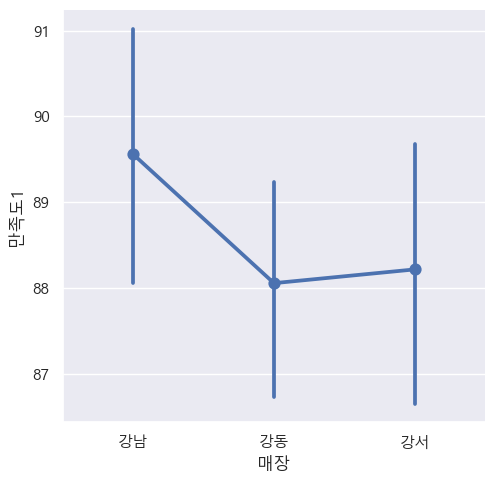

In [28]:
# 그래프

sns.catplot(x = "매장",
            y = "만족도1",
            kind = "point",
            data = owa_df)
plt.show()

### 4.2 차이가 있는 경우

In [29]:
# 양측 검정 ; 등분산 가정

pg.anova(dv = '만족도2',
         between = '매장',
         data = owa_df,
         detailed = True).round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,매장,822.52,2,411.26,14.804,0.0,0.168
1,Within,4083.72,147,27.78,NaN,NaN,NaN


In [31]:
# 양측 검정 ; 등분산 가정

pg.anova(dv = '만족도3',
         between = '매장',
         data = owa_df,
         detailed = True).round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,매장,306.52,2,153.26,5.834,0.004,0.074
1,Within,3861.64,147,26.27,NaN,NaN,NaN


In [32]:
# 양측 검정 ; 등분산 가정

pg.anova(dv = '만족도4',
         between = '매장',
         data = owa_df,
         detailed = True).round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,매장,735.853,2,367.927,18.678,0.0,0.203
1,Within,2895.720,147,19.699,NaN,NaN,NaN


In [33]:
# 양측 검정 ; 등분산 가정

pg.anova(dv = '만족도5',
         between = '매장',
         data = owa_df,
         detailed = True).round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,매장,1228.653,2,614.327,39.801,0.0,0.351
1,Within,2268.920,147,15.435,NaN,NaN,NaN


### 4.3 사후 검정 (post-hoc 분석) ; 다중 비교

In [36]:
# post-hoc test : LSD

pg.pairwise_tests(data = owa_df,
                  dv = '만족도2',
                  between='매장').round(3)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,매장,강남,강동,False,True,5.281,98.0,two-sided,0.000,1.77e+04,1.048
1,매장,강남,강서,False,True,1.217,98.0,two-sided,0.226,0.407,0.242
2,매장,강동,강서,False,True,-4.085,98.0,two-sided,0.000,241.199,-0.811


### 다중 비교
    bonferroni's MSD
    Scheffe
    Tukey'HSD

## 5. 등분산 검정
    - pg 패키지에는 잔차의 등분산 검정이 없음
    - statsmodels 패키지 사용

### 5.1 등분산일 때


In [41]:
# 등분산이면 지금까지 문제한 것이 문제 없음

pg.homoscedasticity(owa_df,
                    dv = '만족도5',
                    group = '매장')

,W,pval,equal_var
levene,11.235009,0.000029,False


만족도 4, 5 : False

### 5.2 이분산일 떄

In [ ]:
# welch's test

pg.welch_anova(dv = '만족도4',
               between = '매장',
               data = owa_df).round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,매장,2,83.173,20.622,0.0,0.203


In [44]:
# welch's test

pg.welch_anova(dv = '만족도5',
               between = '매장',
               data = owa_df).round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,매장,2,89.092,83.212,0.0,0.351


둘 다 차이 있음

In [46]:
# 이분산 사후 검정

pg.pairwise_gameshowell(dv = '만족도4',
                        between = '매장',
                        data = owa_df).round(3)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,강남,강동,89.56,86.06,3.50,1.041,3.361,95.527,0.003,0.667
1,강남,강서,89.56,84.22,5.34,0.853,6.263,63.805,0.000,1.243
2,강동,강서,86.06,84.22,1.84,0.743,2.476,69.054,0.041,0.491


## 6. 잔차의 정규성 검정

In [49]:
# 잔차 : 오차항

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
model = ols('만족도4 ~ C(매장)',
            data = owa_df)
results = model.fit()
pg.normality(results.resid).round(3) #resid : 잔차

,W,pval,normal
0,0.989,0.268,True


In [52]:
## 6.1 비모수 검정

In [55]:
# kruskal wallis

pg.normality(owa_df, dv = '만족도5', group='매장')

,W,pval,normal
매장,,,
강서,0.838371,0.000008,False
강동,0.957795,0.071865,True
강남,0.889787,0.000225,False


In [ ]:
model = ols('만족도5 ~ C(매장)',
            data = owa_df)
results = model.fit()
pg.normality(results.resid).round(3) #resid : 잔차

,W,pval,normal
0,0.912,0.0,False


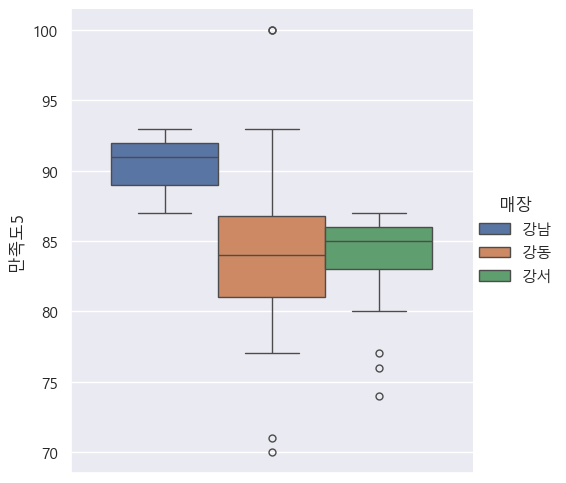

In [61]:
sns.catplot(data = owa_df,
            y = owa_df['만족도5'],
            hue = owa_df['매장'],
            kind = 'box')

plt.show()

In [ ]:
# 데이터가 적으므로 이상치 제거하지 않고 비모수 검정

pg.kruskal(data = owa_df,
           dv = '만족도5',
           between = '매장').round(3)

,Source,ddof1,H,p-unc
Kruskal,매장,2,73.725,0.0


In [63]:
# 비모수 사후 검정
pg.pairwise_tests(data = owa_df,
                  dv = '만족도5',
                  between = '매장',
                  parametric = False).round(3)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,hedges
0,매장,강남,강동,False,False,2175.0,two-sided,0.000,1.366
1,매장,강남,강서,False,False,2468.5,two-sided,0.000,2.410
2,매장,강동,강서,False,False,1200.0,two-sided,0.731,0.030


"강남-강동", "강남-강서" 는 차이가 없지만 "강동-강서" 는 차이가 있음

## 7. statsmodels 이용

In [ ]:
# tuky HSD 사후 검정 활

model = ols('만족도1 ~ 매장', data = owa_df).fit() # 선형 회귀 구하는 함
aov_table = sm.stats.anova_lm(model, typ = 2) # 일반적으로 ANOVA는 typ 2
aov_table.round(3)

,sum_sq,df,F,PR(>F)
매장,67.853,2.0,1.221,0.298
Residual,4083.720,147.0,NaN,NaN


pr이 p값. 차이가 없음

In [67]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [70]:
# 모수 사후 검정

posthoc = pairwise_tukeyhsd(owa_df['만족도1'],
                            owa_df['매장'])

print(posthoc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    강남     강동     -1.5 0.3318 -3.9959 0.9959  False
    강남     강서    -1.34 0.4137 -3.8359 1.1559  False
    강동     강서     0.16 0.9874 -2.3359 2.6559  False
---------------------------------------------------


귀무가설 채택 * 3

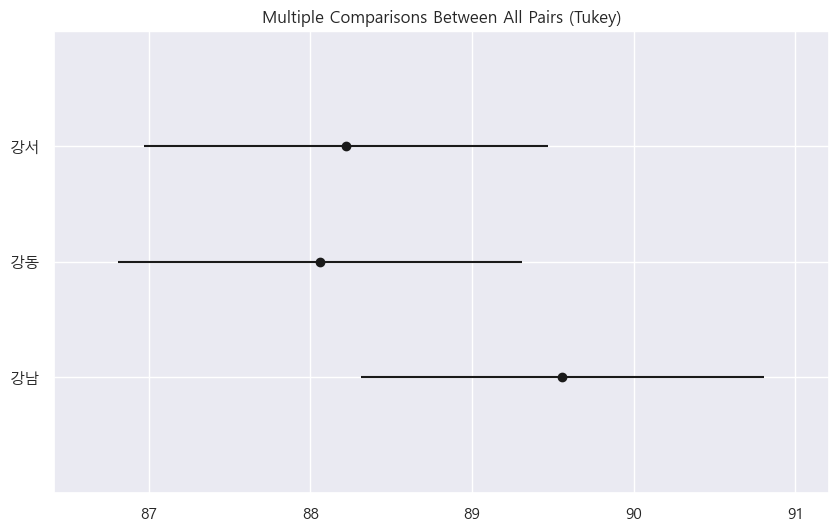

In [ ]:
fig = posthoc.plot_simultaneous()